<a href="https://colab.research.google.com/github/Aayush2799/Prodigy_P4/blob/main/P4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#MountDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set working directory
%cd /content/drive/MyDrive/Prodigy

/content/drive/MyDrive/Prodigy


### Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Loading the data

In [ ]:
dft = pd.read_csv('/content/drive/MyDrive/Prodigy/P4/twitter_training.csv')
dfv = pd.read_csv('/content/drive/MyDrive/Prodigy/P4/twitter_validation.csv')

In [ ]:
dft.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
dfv.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


# Data Cleaning

### We will rename columns for our better understanding

In [ ]:
dft.columns = ['ID', 'Entity', 'Sentiment', 'Tweet']
dfv.columns = ['ID', 'Entity', 'Sentiment', 'Tweet']

In [ ]:
dft.head()

,ID,Entity,Sentiment,Tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
dfv.head()

,ID,Entity,Sentiment,Tweet
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


### We will drop rows with missing values in Tweet column

In [ ]:
dft_cleaned = dft.dropna(subset=['Tweet'])
dfv_cleaned = dfv.dropna(subset=['Tweet'])

In [ ]:
print(dft_cleaned.isnull().sum())
print(dft_cleaned.info())


ID           0
Entity       0
Sentiment    0
Tweet        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 73995 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         73995 non-null  int64 
 1   Entity     73995 non-null  object
 2   Sentiment  73995 non-null  object
 3   Tweet      73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB
None


In [ ]:
dft_cleaned.describe

<bound method NDFrame.describe of          ID       Entity Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74676  9200       Nvidia  Positive   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   

                                                   Tweet  
0      I am coming to the borders and I will kill you...  
1      im getting on borderlands and i will kill you ...  
2      im coming on borderlands and i will murder you...  
3      im getting on borderlands 2 and i will murder ...  
4      im getting into borderlands and i can murder y...  
...                                                  ...  
74676  Just realized that the Windows partition of my...  
74677  Just realized that my Mac window partition is ...  
74678  Just realized the windows partition of my Mac ...  
74679  Just realized between the windows partition of...  
74680  Just like the windows partition of my Mac is l...  

[73995 rows x 4 columns]>

### Now, we will analyse the distribution of Sentiment Labels

In [ ]:
Sentiment_Dist = dft_cleaned['Sentiment'].value_counts()

# Visualization

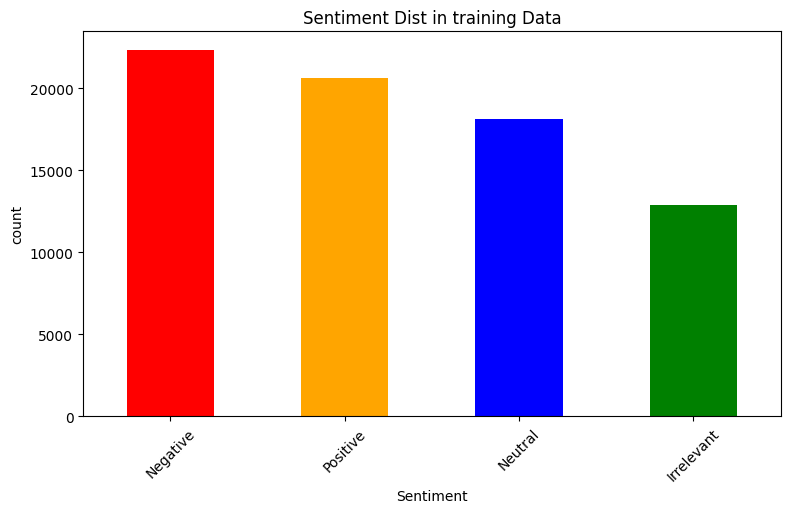

In [ ]:
plt.figure(figsize=(9,5))
Sentiment_Dist.plot(kind='bar', color=['red','orange','blue','green'])
plt.title('Sentiment Dist in training Data')
plt.xlabel('Sentiment')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

Now, we will analyse the sentiment distribution by entities.

In [ ]:
Entity_Sentiment_Dist = dft_cleaned.groupby(['Entity','Sentiment']).size().unstack(fill_value=0)

In [ ]:
top_entities = Entity_Sentiment_Dist.sum(axis=1).sort_values(ascending=False).head(10)
Entity_Sentiment_Dist_top = Entity_Sentiment_Dist.loc[top_entities.index]

Plotting

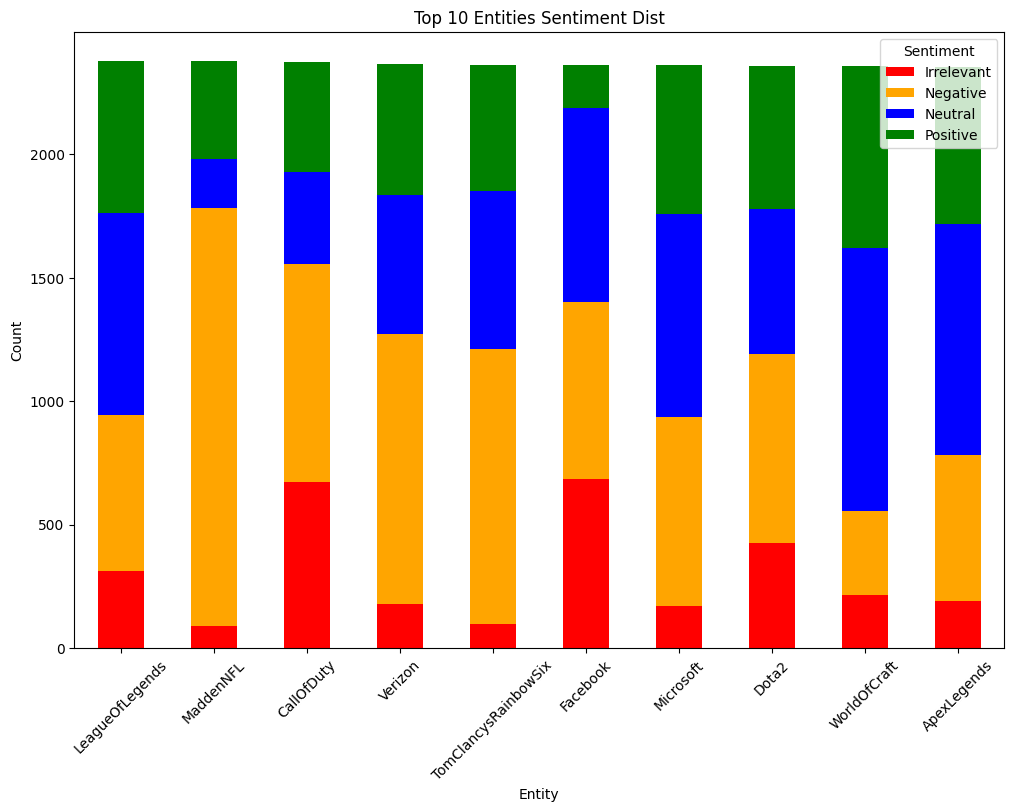

In [ ]:
Entity_Sentiment_Dist_top.plot(kind='bar', stacked = 'True', figsize = (12,8),color = ['red','orange','blue','green'])
plt.title('Top 10 Entities Sentiment Dist')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()
